In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('J:Onur Serce/dlc_real-alja_onur-2020-04-06/videos/Control_3_Day_1_croppedDLC_resnet50_dlc_realApr6shuffle1_50000.csv',
                header=[0,1,2])

In [3]:
df.head()

scorer DLC_resnet50_dlc_realApr6shuffle1_50000                         \
  bodyparts                                left_ear                          
     coords                                       x           y likelihood   
0         0                              424.751404  335.055084   0.999625   
1         1                              421.689575  336.742767   0.999967   
2         2                              414.934631  338.533478   0.999902   
3         3                              407.659607  339.128113   0.999965   
4         4                              398.432281  339.544983   0.999906   

                                                                         ...  \
    right_ear                              snout                         ...   
            x           y likelihood           x           y likelihood  ...   
0  424.990692  319.519257   0.999884  406.577667  323.207977   0.999932  ...   
1  422.802002  321.797913   0.999983  402.771210  326.193085   0.999986  ...   
2  415.218567  324.093292   0.999925  396.618896  329.589264   0.999974  ...   
3  409.189178  324.656860   0.999964  389.478424  328.581116   0.999979  ...   
4  401.767853  326.037567   0.999927  381.818726  329.049316   0.999967  ...   

                                                                          \
  paw_f_right  paw_f_left                        paw_h_right               
   likelihood           x           y likelihood           x           y   
0    0.255540  513.385437  390.163177   0.002420  455.009644  301.675873   
1    0.068578  512.880127  389.441254   0.001889  452.961700  305.761139   
2    0.204560  510.633911  374.446259   0.004359  445.929443  307.168640   
3    0.011645  510.991974  373.813141   0.003016  443.210663  309.139557   
4    0.005045  511.847443  373.460876   0.004003  445.996124  310.874573   

                                                 
              paw_h_left                         
  likelihood           x           y likelihood  
0   0.851738  515.065979  396.378571   0.002179  
1   0.597118  452.030975  343.254791   0.007390  
2   0.998907  450.145477  342.313629   0.051436  
3   0.989437  448.721344  340.532379   0.005895  
4   0.992309  447.798279  341.296967   0.025118  

[5 rows x 37 columns]

In [4]:
from sklearn import decomposition

X = df.iloc[:, 1:]

pca = decomposition.PCA(whiten=True, svd_solver='full')

transformed = pca.fit_transform(X)

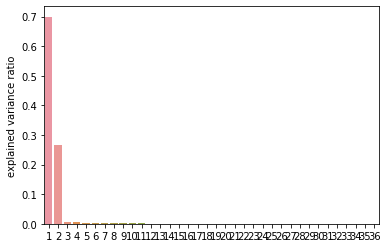

In [5]:
expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1,37)))

In [6]:
eigenmouse = pca.components_

In [7]:
pca.mean_

array([1.58891448e+02, 1.62773917e+02, 9.81683212e-01, 1.54253027e+02,
       1.64804544e+02, 9.77414413e-01, 1.59240567e+02, 1.69780850e+02,
       9.11068264e-01, 1.52136258e+02, 1.54660371e+02, 9.94796773e-01,
       1.58418692e+02, 1.51949888e+02, 9.66818063e-01, 1.45275870e+02,
       1.58170741e+02, 9.75002733e-01, 1.45606209e+02, 1.43995041e+02,
       9.49729714e-01, 1.60828992e+02, 1.42258787e+02, 8.68176697e-01,
       1.47584756e+02, 1.62140239e+02, 9.25240463e-02, 1.59844251e+02,
       1.53760367e+02, 4.55597675e-02, 1.50558736e+02, 1.56107063e+02,
       1.38982377e-01, 1.63524709e+02, 1.52044471e+02, 1.60565855e-01])

In [11]:
eigenmouse.shape

(36, 36)

In [ ]:
def generate_reconstructed_points(k, rotation):
    R = np.array([[np.cos(np.radians(rotation)), -np.sin(np.radians(rotation))],
                  [np.sin(np.radians(rotation)), np.cos(np.radians(rotation))]])
    all_points = []
    for i, tail_shape in enumerate(k):
        vs = np.array([-np.cos(tail_shape), np.sin(tail_shape)]).T
        ps = np.zeros((len(vs) + 1, 2))
        ps[1:] = np.cumsum(vs, axis=0)
        if rotation:
            ps = np.dot(R, ps.T)
        else:
            ps = ps.T
        all_points.append(ps)
    return np.array(all_points)


def plot_reconstructed_points(ax, points,  fs=500., color='time', lw=3, **kwargs):
    """Plot an overlay of tail points on a given axes.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes instance on which to plot the tail points.
    points : np.ndarray
        An array of xy coordinates representing the tail in each frame with shape (n_frames, 2, n_points).
    fs : float
        The sampling frequency at which data were acquired.
    color : str or Colormap or list-like, optional
        If string, should be either a valid matplotlib color or {'t', 'time'} or 'binary'. If 't' or 'time' the
        standard TimeMap is used. If 'binary' the Binary colormap is used. Otherwise, a Colormap instance for computing
        the color of the tail in each frame. Otherwise, a list of colors corresponding to each frame.
    lw : int or float, optional
        The line width of the tail.

    Other Parameters
    ----------------
    t_lim : tuple of floats
        The first and last time frame to plot (in seconds). Default behavior is to plot all frames.
    alpha : float
        Alpha value (between 0 and 1).
    c_lim : tuple
        Tuple of floats. Upper and lower values for initializing the TimeMap. Default is the same as t_lim.

    Returns
    -------
    None
    """
    fs = float(fs)
    plotting_kwargs = dict(lw=lw)
    # Calculate frames to plot
    bout_length = len(points) / fs
    t_lim = kwargs.get('t_lim', (0, bout_length))
    first_frame = int(t_lim[0] * fs)
    last_frame = int(t_lim[1] * fs)
    ps = points[first_frame:last_frame]
    # Set colors
    if is_color_like(color):
        colors = color
        plotting_kwargs['alpha'] = kwargs.get('alpha', 1)
    elif isinstance(color, str):
        if color.lower() in ('t', 'time'):  # If standard TimeMap being used
            c_lim = kwargs.get('c_lim', t_lim)
            colors = TimeMap(*c_lim).map(np.linspace(t_lim[0], t_lim[1], len(ps)))
        elif color == 'binary':  # If BinaryMap being used
            colors = ColorMap('binary', (0, len(ps) - 1)).map(np.arange(len(ps)))
        else:
            raise ValueError('c must be valid color')
        plotting_kwargs['alpha'] = kwargs.get('alpha', 1)
    elif isinstance(color, ColorMap):  # If an alternative Colormap is being used
        colors = color.map(np.arange(len(ps)))
    else:  # If a list of colors is being used
        colors = color[-len(ps):]
    # Plot
    for i, (xs, ys) in enumerate(ps):
        ax.plot(xs, ys, color=colors[i], **plotting_kwargs)

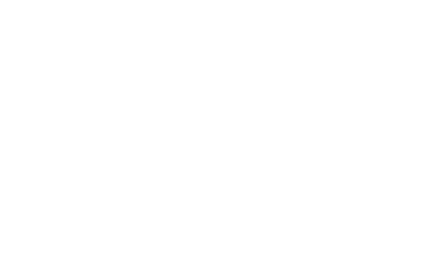

In [28]:
from matplotlib import gridspec
std = 1
mean = 5

eigenfish = eigenmouse.copy()
n_components = 3

fig = plt.figure()
gs = gridspec.GridSpec(1, n_components, left=0, right=1, bottom=0.05, top=0.95, wspace=0)
axes = [fig.add_subplot(gs[i]) for i in range(n_components)]

for pc, ax in enumerate(axes):
    eigenseries = np.array([eigenfish[pc] * i for i in np.linspace(0, 10, 50)])
    eigenseries = (eigenseries * std) + mean
    tail_points = generate_reconstructed_points(eigenseries, 90)
#    plot_reconstructed_points(ax, tail_points, color='binary', lw=2)
    ax.set_xlim(-50, 0)
    ax.axis('equal')
    ax.axis('off')

plt.show()

In [ ]:
def map_data(data, vectors):
    assert vectors.shape[1] == data.shape[1]
    mapped = np.dot(data, vectors.T)
    return mapped

# mapped = map_data(data_to_map, vectors)

In [ ]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 1:])
X.shape
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:5000])
X_transformed.shape

In [ ]:
isoplot = pd.DataFrame(data=X_transformed, columns=['one','two'])

In [ ]:
sns.scatterplot(data=isoplot, x='one', y="two")